<a href="https://colab.research.google.com/github/gdsghost/IN4720---Geographic-Information-Systems/blob/main/GIS_Lec3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 27.4 MB/s 
     |████████████████████████████████| 16.7 MB 480 kB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 


In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
data_load = files.upload()

Saving Cities_SL_CSV.csv to Cities_SL_CSV.csv


In [4]:
df = pd.read_csv('Cities_SL_CSV.csv')
df

,City,Latitude,Longitude
0,Kurunegala,7.472981,80.354729
1,Gampola,7.126777,80.564677
2,Polonnaruwa,7.940338,81.018798
3,Gampaha,7.08731,80.014366
4,Kilinochchi,9.380289,80.377000


In [7]:
geo_df = geopandas.GeoDataFrame(df,geometry=geopandas.points_from_xy(df.Longitude,df.Latitude))
geo_df

,City,Latitude,Longitude,geometry
0,Kurunegala,7.472981,80.354729,POINT (80.35473 7.47298)
1,Gampola,7.126777,80.564677,POINT (80.56468 7.12678)
2,Polonnaruwa,7.940338,81.018798,POINT (81.01880 7.94034)
3,Gampaha,7.08731,80.014366,POINT (80.01437 7.08731)
4,Kilinochchi,9.380289,80.377000,POINT (80.37700 9.38029)


In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

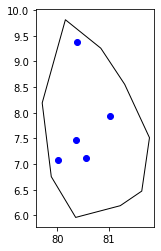

In [18]:
ax = world[world.name=='Sri Lanka'].plot(color='white',edgecolor='black')
geo_df.plot(ax=ax,color='blue')
plt.show()

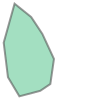

In [19]:
world[world['iso_a3']=="LKA"]
world.loc[138,'geometry']

In [20]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [21]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.014316
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.016512
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.009756
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.035766


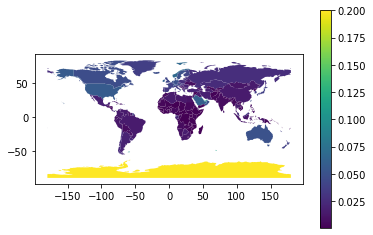

In [25]:
world.plot(column = 'gdp_per_cap', legend = 'true');